In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df_transaction = pd.read_excel("/Users/dheerajreddyk/Desktop/Jobs/Forage-quantium/QVI_transaction_data.xlsx")

In [3]:
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
df_transaction['DATE'] = pd.to_datetime(df_transaction['DATE'],unit ='D', origin ='1899-12-30')

In [5]:
df_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [6]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [7]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [8]:
df_transaction['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [121]:
# Remove digits from the product names
prod_name = df_transaction['PROD_NAME'].str.replace(r'[0-9]+[gG]','');

# Remove & characters from the product names and replace with a space to separate flavours
prod_name = prod_name.str.replace(r'&',' ');

In [122]:
# Count the frequencies of words in product names and display counts in descending order
word_counts = pd.Series(' '.join(prod_name).split()).value_counts()

with pd.option_context('display.max_rows', None): # show all rows
  display(word_counts)

175g                  60561
Chips                 49770
150g                  41633
Kettle                41288
Smiths                28860
Salt                  27976
Cheese                27890
Pringles              25102
134g                  25102
Doritos               24962
Crinkle               23960
110g                  22387
Corn                  22061
Original              21560
Cut                   20754
Chip                  18645
170g                  18502
Salsa                 18094
Chicken               15407
Chilli                15390
165g                  15297
Sea                   14145
Thins                 14075
Sour                  13882
Crisps                12607
330g                  12540
Vinegar               12402
300g                  12041
RRD                   11894
Sweet                 11060
Infuzions             11057
Supreme               10961
Chives                10951
Cream                 10723
WW                    10320
Popd                

In [124]:
# Remove salsas from the dataset
df_transaction = df_transaction[df_transaction['PROD_NAME'].str.contains(r"[Ss]alsa") == False]
df_transaction.shape # check for a reduction in no of rows 

(246740, 10)

In [125]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246740,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000,246740.000000
mean,2018-12-30 01:18:58.448569344,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113,175.583521
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000,150.000000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000,170.000000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000,175.000000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000,380.000000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897,59.432118


In [16]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


In [17]:
df_transaction[df_transaction['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [18]:
df_transaction[df_transaction['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [19]:
df_transaction=df_transaction[df_transaction['LYLTY_CARD_NBR']!=226000]

In [20]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,2018-12-30 00:52:10.292938240,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241


In [21]:
df_transaction.value_counts('DATE')

DATE
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: count, Length: 364, dtype: int64

In [22]:
dates=pd.date_range(start = "2018-07-01", end ="2019-06-30", freq='D')
dates_df=pd.DataFrame({'DATE':dates})
transactions_by_day = dates_df.merge(df_transaction.groupby('DATE').size().reset_index(name='N'), on = 'DATE', how = 'left')
transactions_by_day['N'].fillna(0)

0      724.0
1      711.0
2      722.0
3      714.0
4      712.0
       ...  
360    723.0
361    709.0
362    730.0
363    745.0
364    744.0
Name: N, Length: 365, dtype: float64

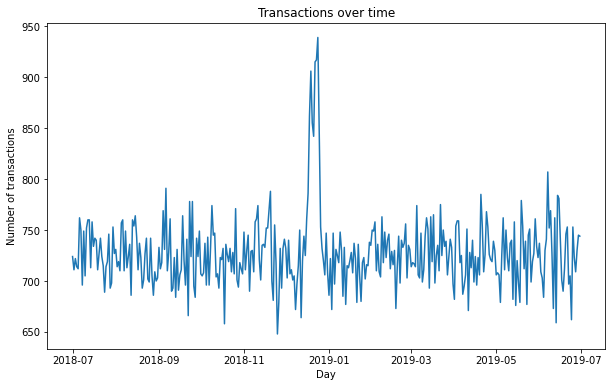

In [23]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(data=transactions_by_day, x='DATE', y='N')
plt.title('Transactions over time')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.show()


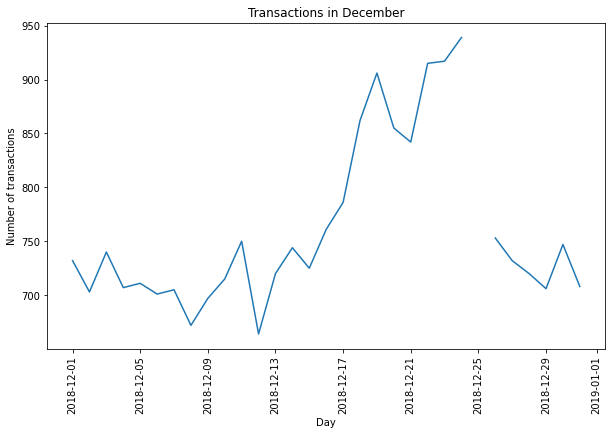

In [24]:
import matplotlib.pyplot as plt

# Filter transactions for December
transactions_december = transactions_by_day[transactions_by_day['DATE'].dt.month == 12]

# Plot transactions for December
plt.figure(figsize=(10, 6))
plt.plot(transactions_december['DATE'], transactions_december['N'])
plt.title('Transactions in December')
plt.xlabel('Day')
plt.ylabel('Number of transactions')
plt.xticks(rotation=90)
plt.show()


In [25]:
df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract('(\d+)').astype(float)

/var/folders/5n/4nmqrgk57s3_0hrp_2dxxcg80000gn/T/ipykernel_2445/3753649899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction['PACK_SIZE'] = df_transaction['PROD_NAME'].str.extract('(\d+)').astype(float)


In [26]:
df_transaction['PACK_SIZE']

0         175.0
1         175.0
2         170.0
3         175.0
4         150.0
          ...  
264831    175.0
264832    175.0
264833    170.0
264834    150.0
264835    175.0
Name: PACK_SIZE, Length: 264834, dtype: float64

In [27]:
# Count the occurrences of each unique pack size
pack_size_counts = df_transaction['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'N']

# Sort the counts by pack size
pack_size_counts_sorted = pack_size_counts.sort_values(by='PACK_SIZE')

# Display the sorted counts
print(pack_size_counts_sorted)


    PACK_SIZE      N
18       70.0   1507
14       90.0   3008
3       110.0  22387
20      125.0   1454
2       134.0  25102
12      135.0   3257
1       150.0  43131
16      160.0   2970
5       165.0  15297
4       170.0  19983
0       175.0  66390
19      180.0   1468
15      190.0   2995
11      200.0   4473
10      210.0   6272
17      220.0   1564
13      250.0   3169
9       270.0   6285
6       300.0  15166
7       330.0  12540
8       380.0   6416


In [28]:
df_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0


(array([  4515.,  23841.,  74460., 106133.,  12309.,   3169.,   6285.,
         15166.,  12540.,   6416.]),
 array([ 70., 101., 132., 163., 194., 225., 256., 287., 318., 349., 380.]),
 <BarContainer object of 10 artists>)

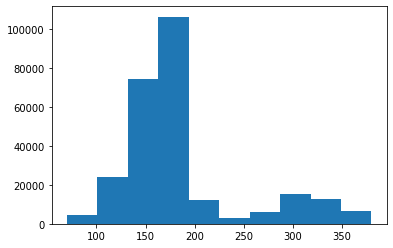

In [29]:
plt.hist(df_transaction['PACK_SIZE'])

In [30]:
# Assuming 'transactionData' is your DataFrame and 'PROD_NAME' is the column containing product names
df_transaction['BRAND'] = df_transaction['PROD_NAME'].str.split().str[0].str.upper()

# Count the occurrences of each brand
brand_counts = df_transaction['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'N']

# Sort the counts by brand occurrence
brand_counts_sorted = brand_counts.sort_values(by='N', ascending=False)

# Display the sorted counts
print(brand_counts_sorted)


         BRAND      N
0       KETTLE  41288
1       SMITHS  28860
2     PRINGLES  25102
3      DORITOS  24962
4        THINS  14075
5          RRD  11894
6    INFUZIONS  11057
7           WW  10320
8         COBS   9693
9     TOSTITOS   9471
10    TWISTIES   9454
11         OLD   9324
12    TYRRELLS   6442
13       GRAIN   6272
14     NATURAL   6050
15         RED   5885
16    CHEEZELS   4603
17         CCS   4551
18  WOOLWORTHS   4437
19      DORITO   3183
20      INFZNS   3144
21       SMITH   2963
22     CHEETOS   2927
23       SNBTS   1576
24      BURGER   1564
25     GRNWVES   1468
26    SUNBITES   1432
27         NCC   1419
28      FRENCH   1418


/var/folders/5n/4nmqrgk57s3_0hrp_2dxxcg80000gn/T/ipykernel_2445/1722971683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_transaction['BRAND'] = df_transaction['PROD_NAME'].str.split().str[0].str.upper()


In [31]:


# Perform brand replacements
df_transaction.loc[df_transaction['BRAND'] == "RED", 'BRAND'] = "RRD"
df_transaction.loc[df_transaction['BRAND'] == "SNBTS", 'BRAND'] = "SUNBITES"
df_transaction.loc[df_transaction['BRAND'] == "INFZNS", 'BRAND'] = "INFUZIONS"
df_transaction.loc[df_transaction['BRAND'] == "WW", 'BRAND'] = "WOOLWORTHS"
df_transaction.loc[df_transaction['BRAND'] == "SMITH", 'BRAND'] = "SMITHS"
df_transaction.loc[df_transaction['BRAND'] == "NCC", 'BRAND'] = "NATURAL"
df_transaction.loc[df_transaction['BRAND'] == "DORITO", 'BRAND'] = "DORITOS"
df_transaction.loc[df_transaction['BRAND'] == "GRAIN", 'BRAND'] = "GRNWVES"




In [32]:
df_transaction['BRAND'].value_counts().sort_values()

BRAND
FRENCH         1418
BURGER         1564
CHEETOS        2927
SUNBITES       3008
CCS            4551
CHEEZELS       4603
TYRRELLS       6442
NATURAL        7469
GRNWVES        7740
OLD            9324
TWISTIES       9454
TOSTITOS       9471
COBS           9693
THINS         14075
INFUZIONS     14201
WOOLWORTHS    14757
RRD           17779
PRINGLES      25102
DORITOS       28145
SMITHS        31823
KETTLE        41288
Name: count, dtype: int64

In [33]:
df_purchase = pd.read_csv("/Users/dheerajreddyk/Desktop/Jobs/Forage-quantium/QVI_purchase_behaviour.csv")

In [34]:
df_purchase

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [35]:
df_purchase.LIFESTAGE.value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

In [36]:
df_purchase.PREMIUM_CUSTOMER.value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

In [37]:
# Assuming 'transactionData' and 'customerData' are your DataFrames to be merged
data = pd.merge(df_transaction, df_purchase, how='left', on='LYLTY_CARD_NBR')

# Display the merged DataFrame
print(data)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264829 2019-03-09        272          272319  270088        89   
264830 2018-08-13        272          272358  270154        74   
264831 2018-11-06        272          272379  270187        51   
264832 2018-12-27        272          272379  270188        42   
264833 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [154]:
data


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND_NAME,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,UNIT_PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,NATURAL,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,CCS,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,SMITHS,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,SMITHS,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,KETTLE,MIDAGE SINGLES/COUPLES,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,Kettle,KETTLE,YOUNG SINGLES/COUPLES,Premium,5.40
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,Tostitos,TOSTITOS,YOUNG SINGLES/COUPLES,Premium,4.40
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,Doritos,DORITOS,YOUNG SINGLES/COUPLES,Premium,4.40
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,Doritos,DORITOS,YOUNG SINGLES/COUPLES,Premium,3.90


In [39]:
data['LIFESTAGE'].isnull().sum()

0

In [40]:
data['PREMIUM_CUSTOMER'].isnull().sum()

0

In [41]:
data.to_csv('/Users/dheerajreddyk/Desktop/Jobs/Forage-quantium/merged.csv')

# Data analysis on customer segments
Now that the data has been cleaned, we want to look for interesting insights in the chip market to help recommend a business strategy.

To do so, some metrics we want to consider are:

Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
<br>How many customers are in each segment
<br>How many chips are bought per customer by segment
<br>What's the average chip price by customer segment
<br>Some more information from the data team that we could ask for, to analyse with the chip information for more insight includes

<br>The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips.
<br>Spending on other snacks, such as crackers and biscuits, to determine the preference and the purchase frequency of chips compared to other snacks
<br>Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips
<br>Firstly, we want to take a look at the split of the total sales by LIFESTAGE and MEMBER_TYPE.

In [42]:
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175.0,KETTLE,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175.0,TOSTITOS,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170.0,DORITOS,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150.0,DORITOS,YOUNG SINGLES/COUPLES,Premium


In [129]:
# calculate total sales by lifestage and member type and generate a list  
total_sales_cust = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'], as_index = False)['TOT_SALES'].agg(['sum'])
total_sales_cust = total_sales_cust.rename(columns={'sum': 'sum_tot_sales'})
total_sales_cust.sort_values(by = "sum_tot_sales", ascending = False)

,LIFESTAGE,PREMIUM_CUSTOMER,sum_tot_sales
6,OLDER FAMILIES,Budget,168363.25
19,YOUNG SINGLES/COUPLES,Mainstream,157621.60
13,RETIREES,Mainstream,155677.05
15,YOUNG FAMILIES,Budget,139345.85
9,OLDER SINGLES/COUPLES,Budget,136769.80
10,OLDER SINGLES/COUPLES,Mainstream,133393.80
11,OLDER SINGLES/COUPLES,Premium,132263.15
12,RETIREES,Budget,113147.80
7,OLDER FAMILIES,Mainstream,103445.55
14,RETIREES,Premium,97646.05


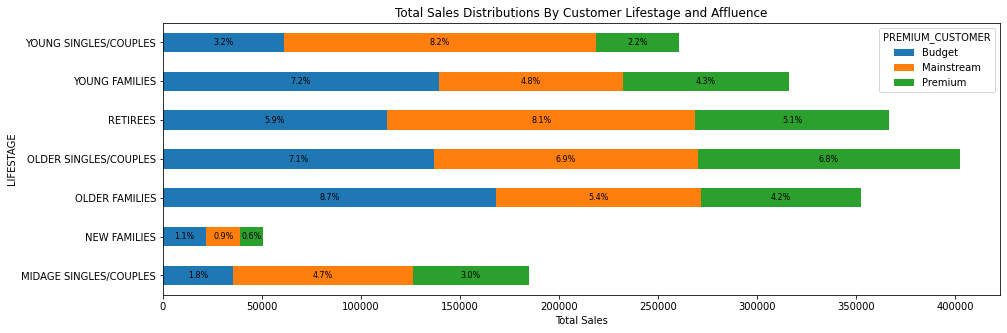

In [137]:
import matplotlib.pyplot as plt

# Calculate total sales
total_sales = data['TOT_SALES'].sum()

# Pivot table to get total sales breakdown by lifestage and member type
total_sales_breakdown = data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='sum')

# Plot the pivot table
ax = total_sales_breakdown.plot(kind='barh', stacked=True, figsize=(15, 5))

# Add percentages of the summed total sales as labels to each bar
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_sales * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{label:.1f}%'
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # Only plot labels greater than 0
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.set_xlabel("Total Sales")
ax.set_title('Total Sales Distributions By Customer Lifestage and Affluence')
plt.show()


### 
Here, we can see the most sales are from Older families - Budget, Young singles/couples - Mainstream and Retirees - Mainstream. We can see if this is because of the customer numbers in each segment.

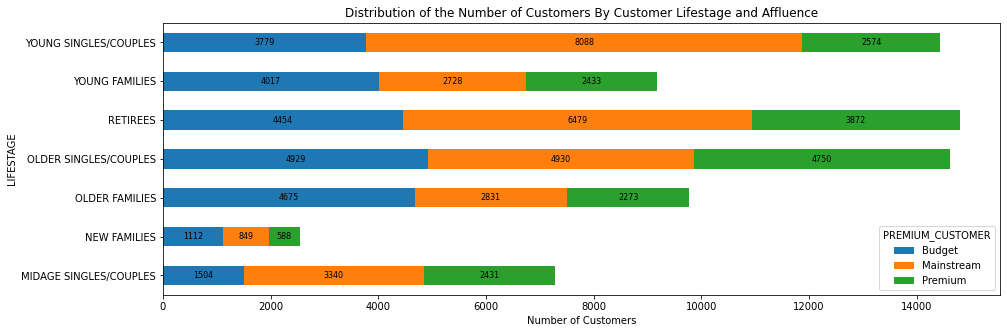

In [139]:

# Create a pivot table to get the count of unique customers by lifestage and member type
customer_counts = data.pivot_table(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR', aggfunc='nunique', fill_value=0)

# Plot the pivot table
ax = customer_counts.plot(kind='barh', stacked=True, figsize=(15, 5))

# Add customer numbers as labels to each bar 
for rect in ax.patches:
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{width:.0f}'
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # Only plot labels greater than 0
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)

ax.set_xlabel("Number of Customers")
ax.set_title('Distribution of the Number of Customers By Customer Lifestage and Affluence')
plt.show()


### 
There are more Young singles/couples - mainstream and Retirees - mainstream who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Older families - budget segment.

We can then take a look at the total and average units of chips bought per customer by LIFESTAGE and MEMBER_TYPE.

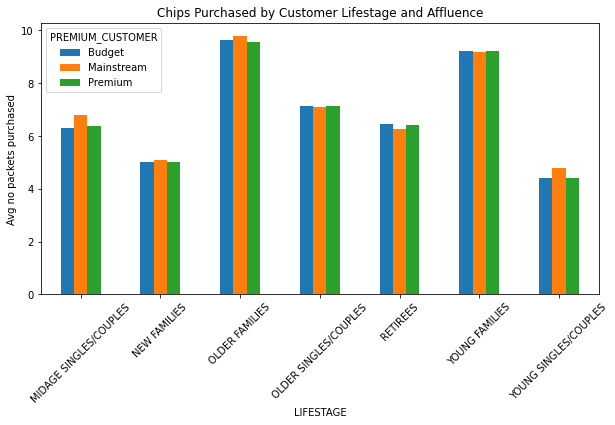

In [143]:
# Plot the average no of chip packets bought per customer by LIFESTAGE and MEMBER_TYPE.
no_packets_data = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()/data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique(0)
ax = no_packets_data.unstack('PREMIUM_CUSTOMER').fillna(0).plot.bar(stacked = False,figsize=(10, 5))
ax.set_ylabel("Avg no packets purchased")
ax.set_title('Chips Purchased by Customer Lifestage and Affluence')
plt.xticks(rotation=45)
plt.show()

### 
Older families and young families in general buy more chips per customer. We can also investigate the average price per unit sold by LIFESTAGE and MEMBER_TYPE

In [118]:
avg_price = data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).apply(lambda x: x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).reset_index(name='AVG')


/var/folders/5n/4nmqrgk57s3_0hrp_2dxxcg80000gn/T/ipykernel_2445/177528096.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [119]:
avg_price

,LIFESTAGE,PREMIUM_CUSTOMER,AVG
0,MIDAGE SINGLES/COUPLES,Budget,3.739975
1,MIDAGE SINGLES/COUPLES,Mainstream,4.000346
2,MIDAGE SINGLES/COUPLES,Premium,3.763535
3,NEW FAMILIES,Budget,3.936178
4,NEW FAMILIES,Mainstream,3.939315
5,NEW FAMILIES,Premium,3.886067
6,OLDER FAMILIES,Budget,3.736009
7,OLDER FAMILIES,Mainstream,3.726962
8,OLDER FAMILIES,Premium,3.704855
9,OLDER SINGLES/COUPLES,Budget,3.883299


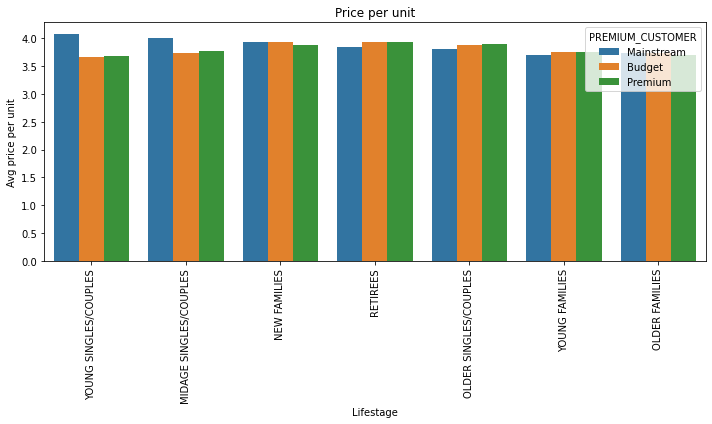

In [120]:
avg_price = avg_price.sort_values(by='AVG',ascending = False)
# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER', data=avg_price)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.xlabel('Lifestage')
plt.ylabel('Avg price per unit')
plt.title('Price per unit')
plt.tight_layout()
plt.show()

For young and midage singles/couples, the mainstream group are more willing to pay more for a packet of chips than their budget and premium counterpart. Given the total sales, as well as the number of customers buying chips, is higher in these groups compared to the non-mainstream groups, this suggests that chips may not be the choice of snack for these groups. Further information on shopping habits would be useful in this case.

As the difference in average price per unit isn’t large, we can check if this difference is statistically different, with a t-test.

In [147]:
# Create a column for the unit price of chips purchased per transaction 
data['UNIT_PRICE'] = data['TOT_SALES']/data['PROD_QTY']

In [148]:
# Check the difference in the average price unit between the mainstream and premium/budget groups for young/midage singles/couples
from scipy.stats import ttest_ind

# Identify the groups to test the hypthesis with 
mainstream = data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")
premium_budget = data["PREMIUM_CUSTOMER"] != "Mainstream"

group1 = data[mainstream & young_midage]["UNIT_PRICE"]
group2 = data[premium_budget & young_midage]["UNIT_PRICE"]

# Generate the t-test 
stat, pval = ttest_ind(group1.values, group2.values, equal_var=False)

print(pval, stat)

0.0 40.60989476220132


The t-test results in a p-value of 6.97e-306, being close to 0, indicates that the unit price for mainstream, young and mid-age singles and couples ARE significantly higher than that of budget or premium, young and midage singles and couples.



Deep dive into specific customer segments for insights
We have found quite a few interesting insights that we can dive deeper into. We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

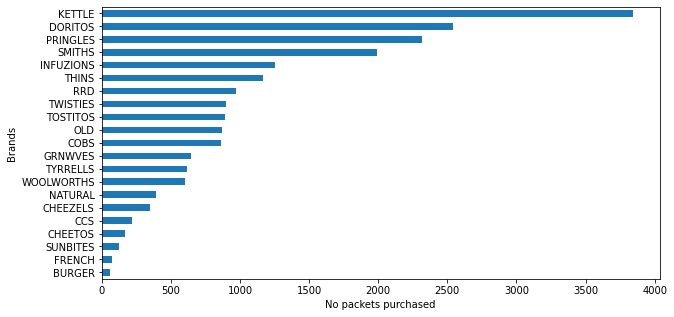

In [158]:
# Create a visual of what brands young singles/couples are purchasing the most for a general indication
young_mainstream = data.loc[data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['PREMIUM_CUSTOMER'] == "Mainstream"]
ax = young_mainstream["BRAND"].value_counts().sort_values(ascending = True).plot.barh(figsize=(10, 5))
ax.set_xlabel("No packets purchased")
ax.set_ylabel("Brands")
plt.show()

In [176]:
temp = data.copy()
temp["group"] = temp["LIFESTAGE"] + ' - ' + temp['PREMIUM_CUSTOMER']

In [177]:
groups = pd.get_dummies(temp["group"])
brands = pd.get_dummies(temp["BRAND_NAME"])
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,Smith,Smiths,Snbts,Sunbites,Thins,Tostitos,Twisties,Tyrrells,WW,Woolworths
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
264831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [183]:
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import OneHotEncoder

In [184]:

from mlxtend.frequent_patterns import apriori
freq_groupsbrands = apriori(groups_brands, min_support=0.008, use_colnames=True)
rules = association_rules(freq_groupsbrands, metric="lift", min_threshold=0.5)
rules.sort_values('confidence', ascending = False, inplace = True)

In [185]:
set_temp = temp["group"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.078744,0.155901,0.014515,0.184329,1.182344,0.002239,1.034852,0.167405
1,(MIDAGE SINGLES/COUPLES - Mainstream),(Kettle),0.044836,0.155901,0.008065,0.179889,1.153863,0.001075,1.029249,0.139605
13,(RETIREES - Budget),(Kettle),0.057398,0.155901,0.009787,0.170515,1.093737,0.000839,1.017618,0.090922
18,(RETIREES - Premium),(Kettle),0.049450,0.155901,0.008368,0.169212,1.085378,0.000658,1.016022,0.082754
7,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069504,0.155901,0.011573,0.166513,1.068064,0.000738,1.012731,0.068487
11,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067038,0.155901,0.011128,0.165991,1.064716,0.000676,1.012097,0.065150
14,(RETIREES - Mainstream),(Kettle),0.081055,0.155901,0.012785,0.157738,1.011779,0.000149,1.002180,0.012669
8,(OLDER SINGLES/COUPLES - Mainstream),(Kettle),0.069168,0.155901,0.010705,0.154766,0.992716,-0.000079,0.998656,-0.007821
21,(YOUNG FAMILIES - Budget),(Kettle),0.072204,0.155901,0.010357,0.143447,0.920116,-0.000899,0.985460,-0.085569
3,(OLDER FAMILIES - Budget),(Kettle),0.087451,0.155901,0.012536,0.143351,0.919495,-0.001098,0.985349,-0.087544


In [186]:
rules[rules['antecedents'] == {'YOUNG SINGLES/COUPLES - Mainstream'}]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
27,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.078744,0.155901,0.014515,0.184329,1.182344,0.002239,1.034852,0.167405
29,(YOUNG SINGLES/COUPLES - Mainstream),(Pringles),0.078744,0.094784,0.008741,0.111010,1.171189,0.001278,1.018252,0.158660
24,(YOUNG SINGLES/COUPLES - Mainstream),(Doritos),0.078744,0.094255,0.008451,0.107318,1.138584,0.001029,1.014633,0.132120


In [189]:
# find the target rating proportion
target_segment = young_mainstream["BRAND"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='target')
target_segment.target /= young_mainstream["PROD_QTY"].sum()

# find the other rating proportion
not_young_mainstream = data.loc[data['LIFESTAGE'] != "YOUNG SINGLES/COUPLES"]
not_young_mainstream = not_young_mainstream.loc[not_young_mainstream['PREMIUM_CUSTOMER'] != "Mainstream"]
other = not_young_mainstream["BRAND"].value_counts().sort_values(ascending = True).rename_axis('BRANDS').reset_index(name='other')
other.other /= not_young_mainstream["PROD_QTY"].sum()

# join the two dataframes 
brand_proportions = target_segment.set_index('BRANDS').join(other.set_index('BRANDS'))
# full_df = trans_df.set_index('LYLTY_CARD_NBR').join(cust_df.set_index('LYLTY_CARD_NBR'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['affinity'] = brand_proportions['target']/brand_proportions['other']
brand_proportions.sort_values(by = 'affinity', ascending = False)

,BRANDS,target,other,affinity
8,TYRRELLS,0.016023,0.012459,1.286010
13,TWISTIES,0.023297,0.018298,1.273158
12,TOSTITOS,0.023038,0.018588,1.239370
11,OLD,0.022443,0.018185,1.234108
20,KETTLE,0.099503,0.080691,1.233133
18,PRINGLES,0.059924,0.048911,1.225166
19,DORITOS,0.065774,0.054761,1.201124
10,COBS,0.022365,0.018645,1.199512
16,INFUZIONS,0.032357,0.027897,1.159870
9,GRNWVES,0.016722,0.015112,1.106537


From apriori analysis, we can see that for Mainstream - young singles/couples, Kettle is the brand of choice. This is also true for most other segments. We can use the affinity index to see if there are brands this segment prefers more than the other segments to target.



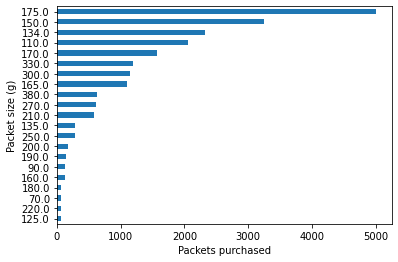

In [192]:
# Plot the distribution of the packet sizes for a general indication of what it most popular. 
young_mainstream = data.loc[data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES"]
young_mainstream = young_mainstream.loc[young_mainstream['PREMIUM_CUSTOMER'] == "Mainstream"]
ax = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).plot.barh()
ax.set_ylabel("Packet size (g)")
ax.set_xlabel("Packets purchased")
plt.show()

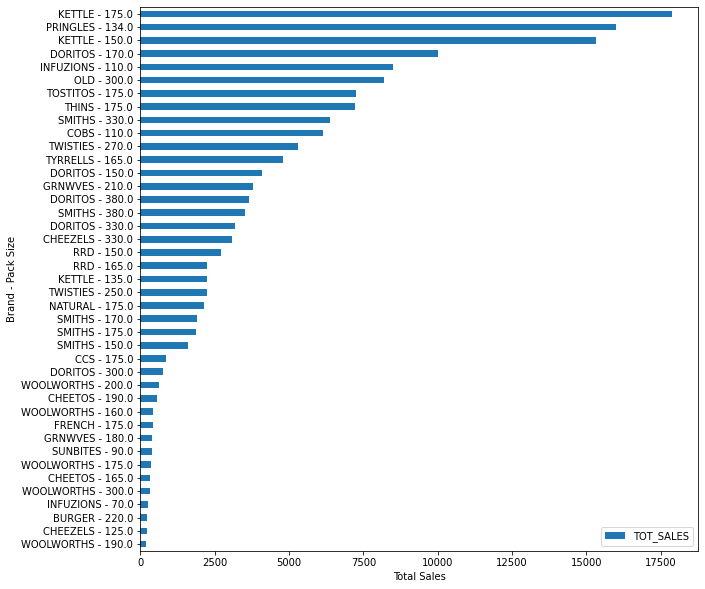

In [174]:
brand_size = young_mainstream.groupby(['BRAND', 'PACK_SIZE'], as_index=False)['TOT_SALES'].sum()
brand_size['BRAND_SIZE'] = brand_size['BRAND'] + ' - ' + brand_size['PACK_SIZE'].astype(str)
ax = brand_size.sort_values(by='TOT_SALES').plot.barh(y='TOT_SALES', x='BRAND_SIZE', figsize=(10, 10))
ax.set_ylabel("Brand - Pack Size")
ax.set_xlabel("Total Sales")
plt.show()

In [193]:
groups = pd.get_dummies(temp["group"])
brands = pd.get_dummies(temp["PACK_SIZE"])
groups_brands = groups.join(brands)
groups_brands

,MIDAGE SINGLES/COUPLES - Budget,MIDAGE SINGLES/COUPLES - Mainstream,MIDAGE SINGLES/COUPLES - Premium,NEW FAMILIES - Budget,NEW FAMILIES - Mainstream,NEW FAMILIES - Premium,OLDER FAMILIES - Budget,OLDER FAMILIES - Mainstream,OLDER FAMILIES - Premium,OLDER SINGLES/COUPLES - Budget,...,180.0,190.0,200.0,210.0,220.0,250.0,270.0,300.0,330.0,380.0
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [194]:
freq_groupsbrands = apriori(groups_brands, min_support=0.009, use_colnames=True)
rules = association_rules(freq_groupsbrands, metric="lift", min_threshold=0.5)
rules.sort_values('confidence', ascending = False, inplace = True)
set_temp = temp["group"].unique()
rules[rules["antecedents"].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
38,(YOUNG FAMILIES - Premium),(175.0),0.043661,0.250685,0.011320,0.259275,1.034266,0.000375,1.011597,0.034643
34,(YOUNG FAMILIES - Budget),(175.0),0.072204,0.250685,0.018581,0.257348,1.026576,0.000481,1.008971,0.027903
24,(RETIREES - Budget),(175.0),0.057398,0.250685,0.014526,0.253075,1.009534,0.000137,1.003200,0.010019
30,(RETIREES - Premium),(175.0),0.049450,0.250685,0.012483,0.252443,1.007013,0.000087,1.002352,0.007327
6,(OLDER FAMILIES - Mainstream),(175.0),0.053785,0.250685,0.013548,0.251896,1.004828,0.000065,1.001618,0.005077
8,(OLDER FAMILIES - Premium),(175.0),0.042253,0.250685,0.010633,0.251653,1.003861,0.000041,1.001293,0.004016
13,(OLDER SINGLES/COUPLES - Budget),(175.0),0.069504,0.250685,0.017464,0.251263,1.002305,0.000040,1.000772,0.002471
20,(OLDER SINGLES/COUPLES - Premium),(175.0),0.067038,0.250685,0.016833,0.251098,1.001648,0.000028,1.000551,0.001763
4,(OLDER FAMILIES - Budget),(175.0),0.087451,0.250685,0.021931,0.250777,1.000366,0.000008,1.000123,0.000401
1,(MIDAGE SINGLES/COUPLES - Mainstream),(175.0),0.044836,0.250685,0.011233,0.250547,0.999450,-0.000006,0.999816,-0.000576


While it appears that most segments purchase more chip packets that are 175g, which is also the size that most Kettles chips are purchased in, we can also determine whether mainstream young singles/couples have certain preferences over the other segments again using the affinity index.

In [195]:
# find the target rating proportion
target_segment = young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).rename_axis('SIZES').reset_index(name='target')
target_segment.target /= young_mainstream["PROD_QTY"].sum()

# find the other rating proportion
other = not_young_mainstream["PACK_SIZE"].value_counts().sort_values(ascending = True).rename_axis('SIZES').reset_index(name='other')
other.other /= not_young_mainstream["PROD_QTY"].sum()

# join the two dataframes 
brand_proportions = target_segment.set_index('SIZES').join(other.set_index('SIZES'))
brand_proportions = brand_proportions.reset_index()
brand_proportions['affinity'] = brand_proportions['target']/brand_proportions['other']
brand_proportions.sort_values(by = 'affinity', ascending = False)

,SIZES,target,other,affinity
11,270.0,0.016049,0.012078,1.328823
12,380.0,0.016204,0.012467,1.299815
15,330.0,0.030933,0.024657,1.254517
10,210.0,0.014910,0.012092,1.233075
18,134.0,0.059924,0.048911,1.225166
17,110.0,0.053091,0.043483,1.220965
9,135.0,0.007507,0.006292,1.193131
8,250.0,0.007248,0.006221,1.165087
16,170.0,0.040769,0.038984,1.045796
14,300.0,0.029742,0.029640,1.003438


Here, we can see that mainstream young singles/couples are 32% more likely to purcahse 270g chips than the other segments. However, they are 50% less likely to purchase 220g chips. The chips that come in 270g bags are Twisties while Burger Rings come in 220g bags, which is consistent with the affinity testing for the chip brands.

## Summary of Insights
The three highest contributing segments to the total sales are:

#### Older families - Budget
#### Young singles/couples - Mainstream
#### Retirees - Mainstream
The largest population group is mainstream young singles/couples, followed by mainstream retirees which explains their large total sales. While population is not a driving factor for budget older families, older families and young families in general buy more chips per customer. Furthermore, mainstream young singles/couples have the highest spend per purchase, which is statistically significant compared to the non-mainstream young singles/couples. Taking a further look at the mainstream yong singles/couples segment, we have found that they are 28% more likely to purchase Tyrells chips than the other segments. This segment does purchase the most Kettles chips, which is also consistent with most other segments. However, they are 50% less likely to purchase Burger Rings, which was also evident in the preferences for packet sizes given they are the only chips that come in 220g sizes. Mainstream young singles/couples are 32% more likely to purchase 270g chips, which is the size that Twisties come in, compare to the other segments. The packet size purchased most over many segments is 175g.

Perhaps we can use the fact that Tyrells and (the packet size of) Twisties chips are more likely to be purchased by mainstream young singles/couples and place these products where they are more likely to be seen by this segment. Furthermore, given that Kettles chips are still the most popular, if the primary target segment are mainstream young singles/couples, Tyrells and Twisties could be placed closer to the Kettles chips. This strategy, with the brands they are more likely to purchase, could also be applied to other segments that purchase the most of Kettles to increase their total sales